In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing our dataset stored in the output folder
df = pd.read_csv('../output/labeled_random_sample_averaged.csv')

In [3]:
df

,sentiment,message,label_vishal,label_viv,label_avery,manual_avg,tweet_id,BERT_numeric,BERT_label
0,2,#New_York City to #Exxon: Pay up for climate c...,-0.10,0.00,-0.7,-0.266667,9.542690e+17,-0.452398,Negative
1,0,"In an ironic twist:\nBased on this theory, wil...",-0.20,0.00,-0.1,-0.100000,8.503370e+17,-0.366810,Negative
2,0,RT @BlacklistedNews: Hypocrite: Obama goes to ...,-0.10,-0.70,-0.2,-0.333333,8.627490e+17,0.029721,Neutral
3,-1,Pres. Trump listed facts about the Paris globa...,-0.40,-0.65,-0.5,-0.516667,8.708680e+17,-0.155424,Neutral
4,-1,Watch: Bill Nye blows gasket when a real scien...,0.30,-0.30,-1.0,-0.333333,8.559110e+17,-0.199630,Neutral
...,...,...,...,...,...,...,...,...,...
95,0,Researcher my next video and found this by som...,-0.70,-0.30,-0.1,-0.366667,8.175400e+17,-0.507220,Negative
96,0,RT @indihj: Someone mapped the Twitter Climate...,0.80,0.90,0.9,0.866667,7.249160e+17,-0.244913,Negative
97,1,RT @og_mr_d: Before the Flood wasn't perfect d...,0.45,0.25,1.0,0.566667,7.932300e+17,-0.413399,Negative
98,2,WWF: World$q$s richest reef system could soon ...,-0.10,-0.10,0.0,-0.066667,6.474240e+17,0.056882,Neutral


In [4]:
# computing the average difference between manual data and BERT
avg_difference = (df["manual_avg"] - df["BERT_numeric"]).mean()
print(avg_difference)

0.19137125784999998


In [5]:
# mapping for the sentiment category - reusing the same mapping from the BERT classification
def get_sentiment_category(score):
    if score <= -0.6:
        return "Highly Negative"
    elif score <= -0.2:
        return "Negative"
    elif score <= 0.2:
        return "Neutral"
    elif score <= 0.6:
        return "Positive"
    else:
        return "Highly Positive"

In [6]:
df["manual_label"] = df["manual_avg"].apply(get_sentiment_category)

In [7]:
df

,sentiment,message,label_vishal,label_viv,label_avery,manual_avg,tweet_id,BERT_numeric,BERT_label,manual_label
0,2,#New_York City to #Exxon: Pay up for climate c...,-0.10,0.00,-0.7,-0.266667,9.542690e+17,-0.452398,Negative,Negative
1,0,"In an ironic twist:\nBased on this theory, wil...",-0.20,0.00,-0.1,-0.100000,8.503370e+17,-0.366810,Negative,Neutral
2,0,RT @BlacklistedNews: Hypocrite: Obama goes to ...,-0.10,-0.70,-0.2,-0.333333,8.627490e+17,0.029721,Neutral,Negative
3,-1,Pres. Trump listed facts about the Paris globa...,-0.40,-0.65,-0.5,-0.516667,8.708680e+17,-0.155424,Neutral,Negative
4,-1,Watch: Bill Nye blows gasket when a real scien...,0.30,-0.30,-1.0,-0.333333,8.559110e+17,-0.199630,Neutral,Negative
...,...,...,...,...,...,...,...,...,...,...
95,0,Researcher my next video and found this by som...,-0.70,-0.30,-0.1,-0.366667,8.175400e+17,-0.507220,Negative,Negative
96,0,RT @indihj: Someone mapped the Twitter Climate...,0.80,0.90,0.9,0.866667,7.249160e+17,-0.244913,Negative,Highly Positive
97,1,RT @og_mr_d: Before the Flood wasn't perfect d...,0.45,0.25,1.0,0.566667,7.932300e+17,-0.413399,Negative,Positive
98,2,WWF: World$q$s richest reef system could soon ...,-0.10,-0.10,0.0,-0.066667,6.474240e+17,0.056882,Neutral,Neutral


In [8]:
# calculating the MAE for the sentiment score
absolute_errors = np.abs(df["manual_avg"] - df["BERT_numeric"])
mae = absolute_errors.sum() / len(absolute_errors)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.3701644310699999


In [ ]:
# calculating the MSE for the sentiment score
absolute_errors = np.square(df["manual_avg"] - df["BERT_numeric"])
mse = absolute_errors.sum() / len(absolute_errors)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2068416713802593


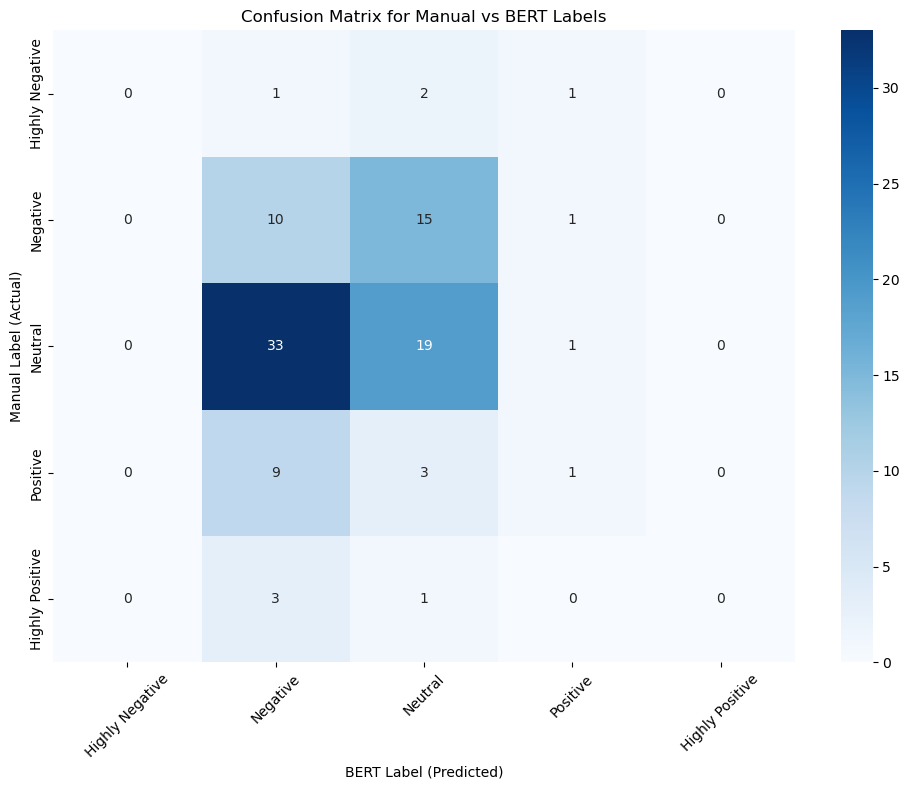

In [ ]:
# category for mapping
categories = ['Highly Negative', 'Negative', 'Neutral', 'Positive', 'Highly Positive']
confusion_matrix = np.zeros((5, 5))

# filling the confusion matrix with the count of the values
for i, true_cat in enumerate(categories):
    for j, pred_cat in enumerate(categories):
        confusion_matrix[i, j] = ((df['manual_label'] == true_cat) & 
                                 (df['BERT_label'] == pred_cat)).sum()


# creating a heatmap off the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='g',
            cmap='Blues',
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Manual Label (Actual)')
plt.xlabel('BERT Label (Predicted)')
plt.title('Confusion Matrix for Manual vs BERT Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()